In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, FBeta
from fastai.callbacks import *

In [4]:
data = ImageDataBunch.from_folder(path='drive/My Drive/Lettuce/', 
                                  train = 'lettuce_train', 
                                  valid = 'lettuce_val',
                                  ds_tfms = get_transforms(),
                                  size =256,
                                  bs=64)

In [5]:
data.classes

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy',
 'lettuce_Downy_mildew',
 'lettuce_Septoria_blight',
 'lettuce_Wilt_and_leaf_blight',
 'lettuce_bacterial',
 'lettuce_healthy',
 'lettuce_powdery_mildew']

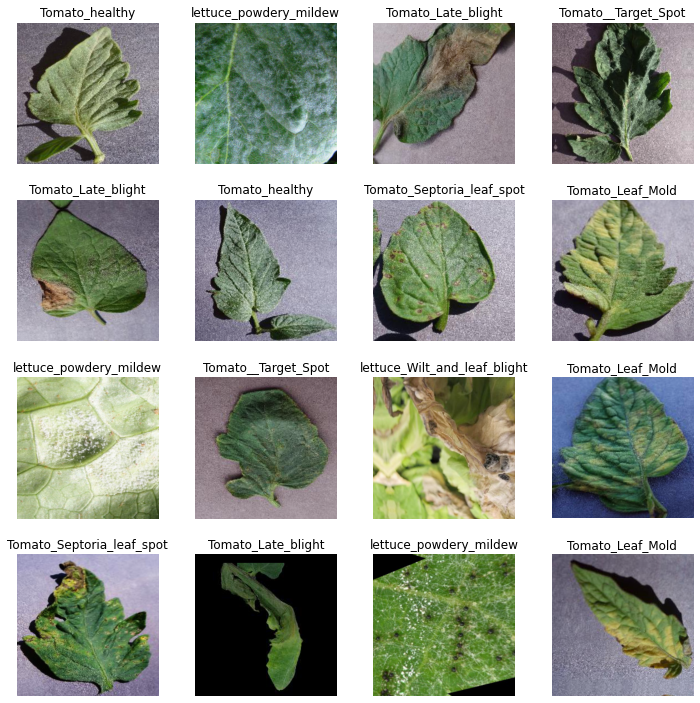

In [6]:
data.show_batch(rows = 4, figsize=(10,10))

In [7]:
model= cnn_learner(data,models.resnet34, metrics= accuracy, callback_fns= ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.996981,0.491459,0.838667,33:16
1,0.459891,0.290930,0.902667,03:11
2,0.328179,0.221437,0.923333,03:08
3,0.241481,0.144382,0.952667,03:08
4,0.149842,0.101191,0.966667,03:07
5,0.137986,0.114541,0.964000,03:07
6,0.086967,0.091011,0.978000,03:00
7,0.082211,0.061805,0.979333,03:01
8,0.069121,0.056230,0.978667,02:57
9,0.065137,0.057971,0.978000,02:54


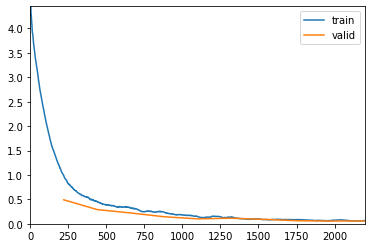

In [8]:
# model.unfreeze() 
# model.fit_one_cycle(3, max_lr=slice(1e-03, 1e-02))
model.fit_one_cycle(10, callbacks =[callbacks.SaveModelCallback(model, every='epoch', monitor = 'valid_loss')])

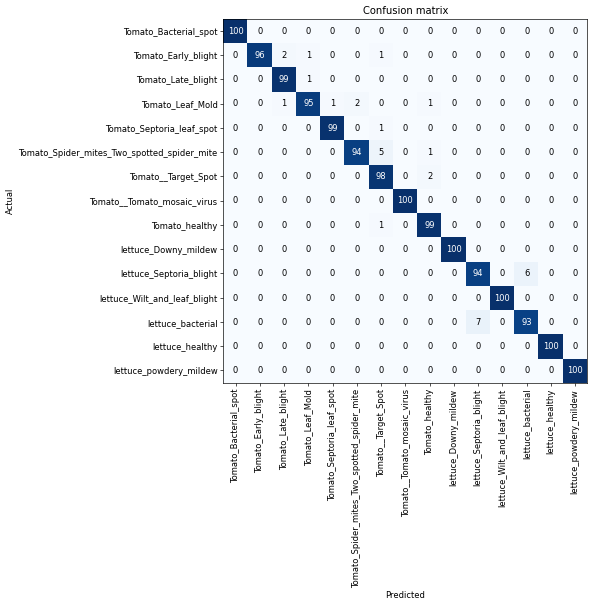

In [9]:
interpret = ClassificationInterpretation.from_learner(model)

interpret.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [10]:
 model.export() 

In [11]:
# model = load_learner('drive/My Drive/Lettuce/')

In [12]:
def test(test_img_path):
  test_img = open_image(test_img_path)
  pred_class,pred_idx,outputs= model.predict(test_img)
  img = open_image(test_img_path)
  img.show()
  print(pred_class)

lettuce_Downy_mildew


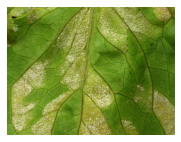

In [13]:

test("/content/drive/My Drive/Lettuce/lettuce_dataset/lettuce_Downy_mildew/02.jpg")



lettuce_healthy


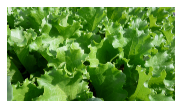

In [14]:
test("/content/drive/My Drive/hydroponics_data/train_data/Lettuce_healthy/lettuce leaves 10.jpg")

lettuce_healthy


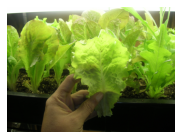

In [15]:
test("/content/drive/My Drive/hydroponics_data/train_data/Lettuce_healthy/lettuce leaves 151.jpg")

lettuce_Septoria_blight


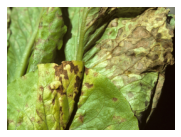

In [16]:
test("/content/drive/My Drive/Lettuce/lettuce_dataset/lettuce_Septoria_blight/s02.jpg")

lettuce_powdery_mildew


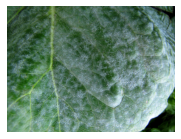

In [17]:
test("/content/drive/My Drive/Lettuce/lettuce_dataset/lettuce_powdery_mildew/p02.jpg")